In [1]:
from sklearn.model_selection import train_test_split
import sklearn.metrics #import r2_score, mean_squared_error, confusion_matrix, rand_score
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import LinearSVR, LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Introduce the notebook, link to binder and nbviewer.

# Introduce Scikit-Learn

## What is Machine Learning?

https://mitsloan.mit.edu/ideas-made-to-matter/machine-learning-explained

Machine Learning is a form of "artificial intelligence" whereby a computer program is able to learn the relationships within large datasets that will allow is to predict the outcomes specified by the programmer. This is done via the use of various algorithms that utilize advanced statistical methods, many of which have been in development for many years, but until recently haven't been widely viable due to a lack of computer processing power. As computers have become faster, data storage has become cheaper, and the acquisition of data has become more widespread, we're now at the point where these algorithms and models can be applied to real world data to gain new insights that a human would not have been able to unearth within a reasonable amount of time. 

It's not only in academia that machine learning has gained in popularity and usefullness. We encounter the outputs of machine learning models everyday as we engage with software and services over the internet and on our devices. Machine learning models allow Amazon to know that I'm probably at least vaguely interested in a newly published English translation of a Chinese Sci-fi novel (and it is correct) (https://www.amazon.science/the-history-of-amazons-recommendation-algorithm), they select the Facebook (https://blog.hootsuite.com/facebook-algorithm/) or LinkedIn posts (https://www.postbeyond.com/blog/how-linkedin-algorithm-works/) that I'm most likely to engage with, and they even make our photos look a bit better (https://aidaily.co.uk/articles/how-machine-learning-is-changing-your-smartphone-camera-1).

Machine learning is therefore all around us, and everyday new applications and algorithms are being developed and tested that in one way or another will alter the way we engage with our world, hopefully for the better.


## Machine Learning Terminology

Before continuing, there are some key phrases and terminology that we must get acquainted with when discussing machine learning. As the machine learning field is at the cross section of computer science, software engineering and statistics, there can be many keywords sharing the same meaning which can of course be confusing. In the pursuit of clarity, throughout this notebook I will be consistent in my use of the following terms and their definitions.

### Feature Variables, Target Variables & Labels

The whole concept of machine learning is based on using the data available to us to predict something that we do not know and which holds high value for us. For this we use a selection of input variables, known as “Features'', in order to predict an output variable, known as the “Target”. In scenarios where we are looking to predict what category something should fall into, the target may also be known as the “label”. For example when predicting if a customer will churn or not, the classification of churn or no-churn would be known as the “label”. https://medium.com/technology-nineleaps/some-key-machine-learning-definitions-b524eb6cb48 

A common example often used in machine learning education materials (e.g. Kaggle - https://www.kaggle.com/c/house-prices-advanced-regression-techniques)  is to use a set of inputs (features) to predict house prices (the target). In this scenario we can use the information we do know (size of the house, how many bedrooms and bathrooms it has, does it have a front and/or rear garden, what neighborhood is it located in) to predict something that we do not know but is important information to us (the house price). As the house price cannot be known until after the house has sold, it is therefore information that is not available to us at the time or prediction.

### Supervised Learning & Unsupervised Learning

https://www.ibm.com/cloud/blog/supervised-vs-unsupervised-learning

Supervised learning are algorithms that require an initial training dataset whereby the algorithm is fed the target variables as well as the feature variables. This means that the algorithm can explore the relationship between the target and features, develop a model, and then apply that model to new unseen data in future. As target variables are a necessity for supervised learning, we must use historical data for the initial training of the model, and in some cases we must manually “label” the data so that a target variable is present. High quality historical data with relevant features and accurate labels or targets is therefore incredibly important for training a supervised learning algorithm. This approach is generally used for regression and classification analysis whereby a prediction can clearly be correct or not as the target variable will at some point be known (e.g. when the house is sold).

As the name suggests, unsupervised learning algorithms have one major difference to their supervised peers - we do not have the target or labels available for it to train on. In these scenarios there is no currently known right or wrong answer, and so the unsupervised algorithms are used to unearth new insights that may not already be available to the data scientist. For example, it’s common to use an unsupervised clustering algorithm to form initial customer segments (https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3) which can then be adapted for use in a supervised classification algorithm in future. Unsupervised algorithms still have the need for high quality and relevant feature data, however the lack of labeled data can make the starting costs lower. However that does come with the drawback that model accuracy may be more ambiguous or that the predictions have less real world usefulness.

### Hyperparameters

Most Machine Learning algorithms also have some key hyperparameters that can be tuned so as to provide the most suitable model possible. These hyperparameters come with their own advantages and disadvantages that must be balanced for the task at hand. For example, it is not uncommon for a particular hyperparameter to improve model performance up to a point, after which increasing the hyperparameter further may lead to negative consequences such as overfitting or exponentially increasing the training time of the model. Similarly, different combinations of hyperparameter values will work better together than others, and so we can use tools such as Scikit-Learn's Grid Search Cross Validation (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) to iterate through numerous specified combinations of hyperparameters and see which works best. I will be utilizing GridSearchCV in my examples later in this notebook.

## What is Scikit-Learn?

Scikit-Learn is one of the most popular and frequently used machine learning libraries available in Python. It boasts a plethora of different algorithms of various types, and works efficiently with other popular Python data science libraries such as Scypy and Numpy (https://scikit-learn.org/stable/faq.html#why-does-scikit-learn-not-directly-work-with-for-example-pandas-dataframe). The off-the-shelf nature of the algorithms included in Scikit-Learn mean that it meets the needs of most data scientists looking to implement machine learning, and the ease of use of the library itself allows for a gentle introduction to machine learning for new and aspiring data scientists.

All of the algorithms included in the library are well vetted, and must follow a similar implementation, thus allowing users to have confidence in the algorithms they are using and be able to move between different algorithms with minimal additional training (other than learning some theory and new parameters) (https://scikit-learn.org/stable/faq.html#what-are-the-inclusion-criteria-for-new-algorithms).

Scikit-Learn also provides a multitude of tools for the preprocessing of data so that it works effectively with a given algorithm (https://scikit-learn.org/stable/data_transforms.html), selecting the most ideal feature variables for a given dataset, and the means of measuring the algorithm’s performance (https://scikit-learn.org/stable/model_selection.html). 

The categories of algorithm available in scikit learn fall into three main categories:
* Classification
* Regression
* Clustering

As we will see in this notebook, it is possible for a family of algorithms to have applications across more than one of these categories. For example in this notebook I will be showing the Classification and Regression variations of Support Vector Machines (SVMs) and Random Forests.

Other resources
https://www.codecademy.com/articles/scikit-learn


## Introduce the datasets I'll use

Throughout the remainder of this notebook, I will be introducing three popular machine learning algorithms, and in order to do so, I will need a dataset. I will now be introducing the two datasets that will feature in my examples, one for classification and clustering, and another for regression.

* One for regression
* One for classification / Clustering.

REMEMBER - THIS IS NOT ABOUT THE DATA ITSELF, IT'S ABOUT THE PACKAGE AND THE ALGORITHMS!

### Classification/Clustering dataset

For the classification and clustering algorithms, I will be creating a toy dataset via the make_classification() method in Scikit-Learn (https://scikit-learn.org/0.16/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification).

This allows us to create a random set of data points, but with a number of classes built in. This can then be used for exploring the algorithms within the Scikit-Learn package. 

For my examples, I will be creating a dataset consisting of 200 samples spread evenly across two classes. Each sample will consist of 5 features, and 1 target (its class). 

In [2]:
from sklearn.datasets import make_classification

# Creating the random data with 200 samples, 5 features, 2 classes, and specifying the random_state for consistency.
classification_data = make_classification(n_samples = 200, n_features = 5, n_classes = 2, random_state = 0)

# Converting the Numpy arrays into a DataFrame for easier exploratory analysis.
classification_df = pd.DataFrame(classification_data[0], columns=['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5'])
classification_df['class'] = classification_data[1]

# Taking a look at the first 5 rows
classification_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,class
0,-0.681280,-0.045704,-0.966313,-0.757872,1.377718,1
1,0.065803,1.738873,-0.200972,-0.316465,0.373916,1
2,1.588805,-0.761573,1.111797,0.255752,-1.246157,0
3,-1.088813,0.771406,-1.024571,-0.523026,1.306456,1
4,0.125190,-0.964612,0.107733,0.046804,-0.132867,0


We can also confirm that we have our 5 features, 1 label and 200 observations via by checking the dataframe's shape.

In [3]:
classification_df.shape

(200, 6)

### Exploratory Analysis & Feature Selection

Now that the Dataframe is created, I can explore the features via a Pairplot. This will create a scatterplot for each combination of features, as well as a histogram of each feature.

This allows me to see which features may be the best candidates to include in the classification algorithm, as scatterplots that have clear distinctions between the classes will likely do well in a clustering or classification algorithm.

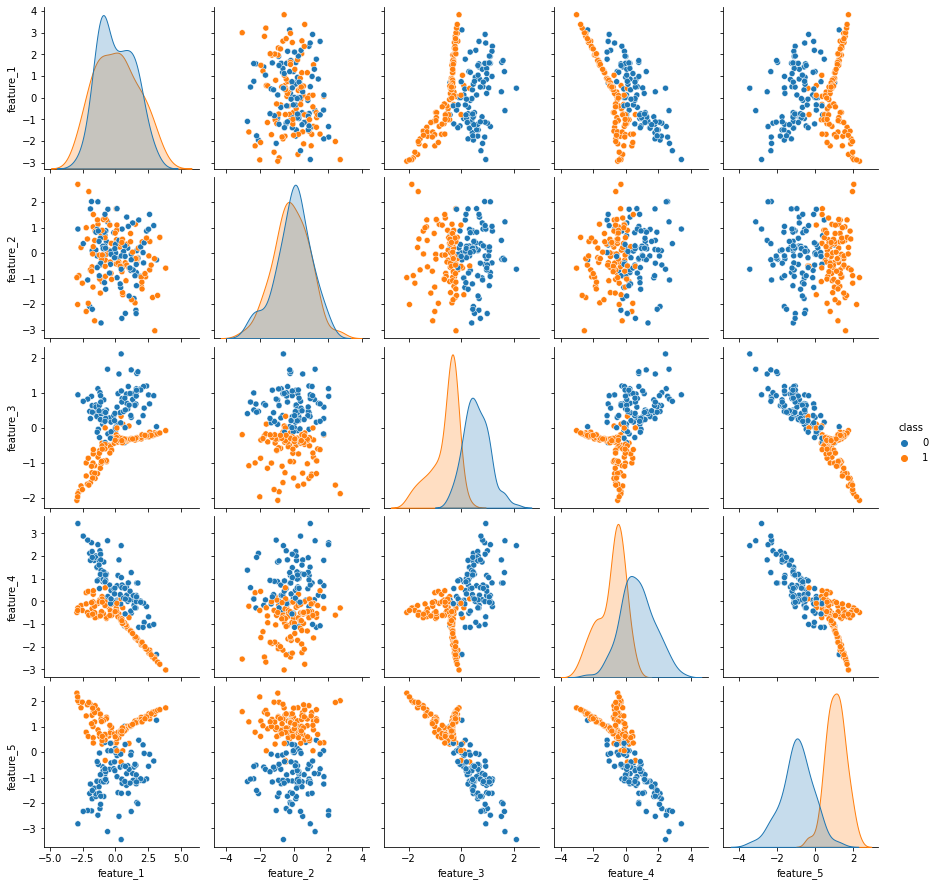

In [4]:
sns.pairplot(classification_df, hue = 'class');

As this is a randomly generated dataset designed to have two classes contained, it's not a surprise to see that we have a number of ideal pairings here. From the histograms we can see that feature_5 has very different distributions for the two classes, and so this will be one of my example features moving forward. 

From the scatter plots, we can see that feature_2 has a good amount of clustering when combined with feature_5, and so for my two dimensional examples, I'll use feature_2 and feature_5. While these two features will be used for the initial classifications, and for my visualizations, all features will be included in the final models.

### Preparing the dataset

I can now prepare my dataset for training and testing the algorithm. The first step is to separate the labels from the features. 

In [5]:
# Specify the column names to be used in the slice.
feature_cols = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5']

# Slice the dataframe
X = classification_df.loc[:, feature_cols]

# Take a look at first 5 rows.
X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,-0.681280,-0.045704,-0.966313,-0.757872,1.377718
1,0.065803,1.738873,-0.200972,-0.316465,0.373916
2,1.588805,-0.761573,1.111797,0.255752,-1.246157
3,-1.088813,0.771406,-1.024571,-0.523026,1.306456
4,0.125190,-0.964612,0.107733,0.046804,-0.132867


Now I'll do the same with the 'class'.

In [6]:
# Specify the column for the labels
labels = ['class']

# Create the slice
y = classification_df.loc[:, labels]

# Take a look at the first 5 rows.
y.head()

,class
0,1
1,1
2,0
3,1
4,0


### Train Test Split

Now that our features and label are separated, we can split out dataset into a training set and a testing set. This allows us to use a portion of the dataset for training our algorithm, and to withhold a portion specifically for testing the algorithm on unseen data. This allows the user to see how the algorithm performs on unseen data, and whether or not the algorithm is underfitting or overfitting to the training data. Once the user is satisfied with the results against the test set, they can include the entire dataset (i.e. the test and training sets) to train the model before productionising it.

As we want our algorithm to train on as much data as possible, the test size usually consists of a much smaller segment of the original dataset. How much exactly depends on how much data is available, for example in sitautions where observations are scarce the user may opt to have just 10-15% of the dataset withheld for testing so that as much as possible can be used for training. In situations where observations are ample, 25-30% can be withheld for testing so as to gain more rigorous testing results.

In [7]:

# Splitting the dataset into training and testing sets, with 25% withheld for testing. 
# Specifying a random_state for consistency.
X_train, X_test, y_train, y_test = train_test_split(classification_df, y, test_size = 0.25, random_state = 0) 

print("Training Samples: " + str(X_train.shape[0]) + "\nTesting Samples: " + str(X_test.shape[0]))

Training Samples: 150
Testing Samples: 50


As I will be using just feature_2 and feature_5 for my 2 dimensional examples, I will now create a slice of X_train and X_test with just these two features. The remaining features will still be used in the final model for each clustering or classification algorithm.

In [8]:
# Specifying the columns for the slice
columns_2d = ['feature_2', 'feature_5']

# Creating the slices
X_train_2d = X_train.loc[:, columns_2d]
X_test_2d =  X_test.loc[:, columns_2d]

# Showing that we now just have 2 features in this dataframe.
X_train_2d.head()

,feature_2,feature_5
71,-0.379148,0.963377
124,0.943046,-2.821705
184,0.457416,-1.360912
97,-2.739677,-1.156461
149,-0.077855,0.733874


Our classification and clustering dataset is now ready to be used in our algorithms!

# Random Forest

* Introduce decision tree and how it works.
* Discuss pros & cons
* Introduce explainability of decision trees (visualize).
* Run a tree on the dataset and visualize.
* Introduce ensemble methods,
* Introduce Random Forest
* Discuss classification and regressor variants.
* Introduce MSE for regression and Confusion Matrix for classification.
* Run a forest on each dataset, visualize and do mse/confusion matrix.
* Discuss how we might optimize the algorithm - nodes, leaves, number of trees, etc.

# Support Vector Machines

* Introduce SVM and how it works
* Discuss pros and cons
* Visualize how it works
* Run SVC and SVR on the dataset
* Do MSE and Confusion Matrix on results.
* Visualize results.
* Discuss how it could be optimized.

## What are Support Vector Machines?

Support Vector Machines are a popular supervised machine learning algorithm that can be used for both regression and classification, however it's generally used more for the latter. Its standout feature is the use of hyperplanes as a method of separating the classes within the dataset. These hyperplanes are in an n-1 dimensional space (with n being the number of dimensions in input data), and creates a dividing plane between the classes. These hyperplanes are optimised to have the maximum width between the classes, thus making the algorithm less prone to overfitting training data. The points at the very edges of this hyerplane are known as the "support vecotrs", and thus give this algorithm it's name (https://towardsdatascience.com/understanding-support-vector-machine-part-1-lagrange-multipliers-5c24a52ffc5e).

It's also important to note that the data input into the algorithm must be scaled, otherwise the results will be negatively impacted (https://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use). In the examples here I will not be going through the preprocessing steps of scaling the data, however these are also possible via Scikit-Learn's preprocessing features (https://scikit-learn.org/stable/modules/preprocessing.html)


## How do they work? - Classification

Let's take a look at this in action for a simple two dimensional dataset with two distinct classes. However, it should be noted that Support Vector Machines will work on datasets beyond two dimensions, and that I am using two dimensional examples here as its is more straightforward for us to visualize.

<img src="images/classification-illustration.png" alt="example of classifier" style="width: 300px;"/>

Here we can see an example of how one algorithm might separate the two classes. This line looks good, and for this training dataset it's accuracy would be perfect. However, it's just one of an infinite number of lines that could have been used for this training set, and its impossible to know which is overfit, which underfit and which is just right.

<img src="images/classification-illustration3.png" alt="example of classifier 3" style="width: 300px;"/>

In this example, our line of best fit could very quickly show itself to be overfit to our data as we add a couple of new data points.

<img src="images/classification-illustration-2.png" alt="example of classifier2" style="width: 300px;"/>

Now, compare this to the plane of maximum width which the Support Vector Classifier optimizes for. 

<img src="images/svc-illustration.png" alt="example of SVC" style="width: 300px;"/>

With the current training dataset, both the line and the hyerplane of maximum width split the classes perfectly, and so it may appear as though the hyerplane is unnecessary. When we add those two additional datapoints as we did before, we see the real benefit of maximizing the distance between the two classes.

<img src="images/svc-illustration2.png" alt="example of SVC2" style="width: 300px;"/>

Whereas picking an arbitrary seperator for the two classes resulted in an overfit algorithm, the hyerplane has significantly reduced that risk, and so the two new datapoints can be classified accurately as they still fall on their respective sides of the hyerplane. If we were to then retrain this algorithm including the new data points, we would end up with a different, newly optimized hyperplane.

### Non Linearly Separated Classes

Thus far we've been looking at classes that can be linearly separated by a straight line, but not all datasets are this simple. In situations where classes cannot be separate by a straight line, but are still discernable, the Support Vector Regressor can utilize what is known as the Kernal Trick (https://vitalflux.com/machine-learning-svm-kernel-trick-example/). https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989

For example, if our features were to look like the below example, no straight line can separate the two classes, and so another solution must be found.

<img src="images/kernal-trick1.png" alt="example of the Kernal Trick" style="width: 300px;"/>

In situations like this, the Kernal Trick allows the SVC to add an additional dimension to the features so as to create more space between them. For example, a new variable Z could be made from X^2 + Y^2 or some other calculation, and so we end up with something like this:

<img src="images/kernal-trick2.png" alt="example of the Kernal Trick 2" style="width: 300px;"/>

Creating the new feature Z from a transformation of the X and Y variables makes the classes easier to separate as shown by the dashed green line representing the new hyerplane. As all of the datapoints have been transformed via the same formula, the algorithm can transform the hyerplane back into 2 dimensions the same way it will for the rest of the data points.

<img src="images/kernal-trick3.png" alt="example of the Kernal Trick 3" style="width: 300px;"/>

Thus when everything is returned to two dimensions, we have a circular hyerplane separating the two classes. 



## Using the Support Vector Classifier

talk through the parameters https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167
run it on 2 dimensions
visualize the decision boundaries (see: https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html)

### Hyperparameters

The Support Vector Machine has three main hyperparameters to keep in mind.
https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167

#### Kernel - Default = 'rbf'

This hyperparameter allows the user to change the kernal type used in the algorithm, with certain types working better for various use cases. For example, the 'linear' kernel is very efficient for features that can be linearly separated as it is the simplest kernal. The default Kernel, Radial Basis Function (RBF) is also a very popular general use kernel that has a good balance between efficiency and being able to handle various distributions of features. Other kernal options available, such as 'poly' and 'sigmoid' are more suited to other classification tasks such as image recognition and deep learning. In my examples I will be using the default Radial Basis Function.

#### C - Default = 1.0

C is the regularisation parameter for this algorithm, and determines how sensitive the algorithm is to misclassified datapoints. This means it plays a major part in determining if the final model will be overfit or underfit, and so the user must tweak this hyperparameter until they have the balance they need for their use case. The lower the value of C is, the lower the penalty that is applied to incorrectly predicted labels, and so we end up with a more general model that has "soft margins" (https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167). Soft margins were introduced to Support Vector Machines in 1995 by Cortes and Vapnik (http://image.diku.dk/imagecanon/material/cortes_vapnik95.pdf) as a method of allow the algorithm to accept some mislabeled data in the pursuit of a more general and usable model. This therefore sacrafices some accuracy, but 100% accuracy would put the model at risk of overfitting, as real world data is unlikely to have a straight dividing line between the classes. Since a lower value for C allows for more errors and a softer margin, it shouldn't be a surprise that a larger value for C will result in a higher penalty for errors and thus thinner margins and higher accuracy.

#### Gamma - Default = 'scale'

Whereas the C value determines the penalty for misclassified datapoints, the Gamme value determines the range at which the influence of each datapoint reaches (https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html). This therefore impacts the size of the area dedicated to a particular class, with higher values of Gamme resulting in areas that more closely surround the training datapoints, and lower values being more general. It therefore shares similarities with the C hyperparameter in that higher values for Gamma can lead to overfitting, as the smaller areas mean that new samples are more likely to fall outside of the area for that given class and thus be misclassified. It therefore requires fine tuning alongside the C hyperparameter. 

The default for Gamme is set to 'scale' which as the name suggests, scales the value to the size of input data. This is calculated as 1 / (number of features * the variation of X) (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). The user can instead specify a positive floating point value for Gamma.

SVM Resources

https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496
https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47
https://pub.towardsai.net/support-vector-machine-svm-a-visual-simple-explanation-part-1-a7efa96444f2
https://medium.com/axum-labs/logistic-regression-vs-support-vector-machines-svm-c335610a3d16
https://medium.com/swlh/visualizing-svm-with-python-4b4b238a7a92
https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589
https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989
https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72
https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02
https://www.kaggle.com/prashant111/svm-classifier-tutorial
https://scikit-learn.org/stable/modules/svm.html
https://towardsdatascience.com/svm-and-kernel-svm-fed02bef1200

# K Means

* Introduce the algorithm.
* Discuss difference between unsurpervised (this) and supervised (the other 2).
* Two different types - KMeans and KMeans++. Discuss the differences.
* Introduce Rand Score as a scoring mechanism.
* Run it on data set, visualize and do a rand score.
* Discuss how it might be optimized, changing K etc.

# Resources

* Train Test Split - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train%20test%20split#sklearn.model_selection.train_test_split

* R2 score - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

* MSE - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error

* Confusion Matrix - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

* Rand Score (Clustering) - https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

* KMeans Clustering - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

* Decision Tree Classification - https://scikit-learn.org/stable/modules/tree.html#classification

* Decision Tree Regression - https://scikit-learn.org/stable/modules/tree.html#regression

* Random Forest Regression - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

* Random Forest classification - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

* SVM Classification - https://scikit-learn.org/stable/modules/svm.html#classification
* https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

* SVM Regression - https://scikit-learn.org/stable/modules/svm.html#regression
* https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR